In [11]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from global_land_mask import globe
import matplotlib as mpl
import scipy
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Image
from matplotlib.colors import ListedColormap

mpl.rcParams['figure.dpi']= 300
plt.rcParams.update({'font.size': 8})
mpl.rcParams['axes.linewidth'] = 0.3

In [10]:
data = xr.open_dataset('/Users/rm65238/Documents/MATLAB/25Dec_10Jan_out.nc')
#data = xr.open_dataset('/Users/rm65238/Documents/MATLAB/26_1_out.nc')
#data = xr.open_dataset('/Users/rm65238/Documents/MATLAB/25_10_out_with85.nc')

In [11]:
data

<xarray.Dataset> Size: 5GB
Dimensions:      (lat: 721, lon: 1440, lev: 1, time: 68, ens: 1)
Coordinates:
  * lon          (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * lat          (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lev          (lev) float64 8B 0.0
  * time         (time) datetime64[ns] 544B 2022-12-25 ... 2023-01-10T18:00:00
  * ens          (ens) float64 8B 1.0
Data variables: (12/51)
    islnd        (lat, lon) float32 4MB ...
    iscst        (lat, lon) float32 4MB ...
    shapemap     (ens, time, lev, lat, lon) float32 282MB ...
    axismap      (ens, time, lev, lat, lon) float64 565MB ...
    tnsctmap     (ens, time, lev, lat, lon) float64 565MB ...
    lflocmap     (ens, time, lev, lat, lon) float32 282MB ...
    ...           ...
    kinstveldir  (ens, time, lev, lat) float64 392kB ...
    axisidx      (ens, time, lev, lat, lon) float64 565MB ...
    axislon      (ens, time, lev, lat, lon) float64 565MB ...
    axislat      (ens, time, lev, lat, lon) float64 565MB ...
    numobj       (ens, time, lev, lat, lon) float32 282MB ...
    kcnt         (ens, time, lev) float64 544B ...
Attributes:
    title:           Global Atmospheric River Database
    version:         2025.06.25
    creation_date:   25-Jun-2025 18:26:33
    tARget_version:  4
    references:      (1) Guan, B., and D. E. Waliser (2015), Detection of atm...

In [12]:
#Check unique values of the variable
check = data.shapemap
print(np.unique(check.values))
#Check where a particular value is in the array
#check.where(check!=np.nan)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. nan]


In [26]:
# South america
lat1, lat2 = -15, -45
lon1, lon2 = 300, 330

# Western US big
lat1, lat2 = 58, 22
lon1, lon2 = 210, 270

frame = 9
data2 = data.sel(lat=slice(lat1,lat2), lon=slice(lon1,lon2)).isel(ens=0, time=frame, lev=0)
data3 = data2.lflocmap

In [27]:
data2 = data.isel(ens=0, time=frame, lev=0)

In [28]:
'2022-12-27T06:00:00.00'

'2022-12-27T06:00:00.00'

In [29]:
data2

<xarray.Dataset> Size: 75MB
Dimensions:      (lat: 721, lon: 1440)
Coordinates:
  * lon          (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * lat          (lat) float64 6kB 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    lev          float64 8B 0.0
    time         datetime64[ns] 8B 2022-12-27T06:00:00
    ens          float64 8B 1.0
Data variables: (12/51)
    islnd        (lat, lon) float32 4MB ...
    iscst        (lat, lon) float32 4MB ...
    shapemap     (lat, lon) float32 4MB nan nan nan nan nan ... nan nan nan nan
    axismap      (lat, lon) float64 8MB ...
    tnsctmap     (lat, lon) float64 8MB ...
    lflocmap     (lat, lon) float32 4MB ...
    ...           ...
    kinstveldir  (lat) float64 6kB ...
    axisidx      (lat, lon) float64 8MB ...
    axislon      (lat, lon) float64 8MB ...
    axislat      (lat, lon) float64 8MB ...
    numobj       (lat, lon) float32 4MB ...
    kcnt         float64 8B ...
Attributes:
    title:           Global Atmospheric River Database
    version:         2025.06.25
    creation_date:   25-Jun-2025 18:26:33
    tARget_version:  4
    references:      (1) Guan, B., and D. E. Waliser (2015), Detection of atm...

In [17]:
check = data2.width
np.unique(check.values)

array([ 176417.94688358,  414069.483858  ,  429558.1433196 ,
        463811.93648429,  521699.45762633,  587300.5374299 ,
        671131.19219743, 1000082.37926014, 1224658.51053906,
       1364349.13305047,              nan])

In [20]:
data3.where(data3==data3.max(), drop=True).lon.values

array([], dtype=float64)

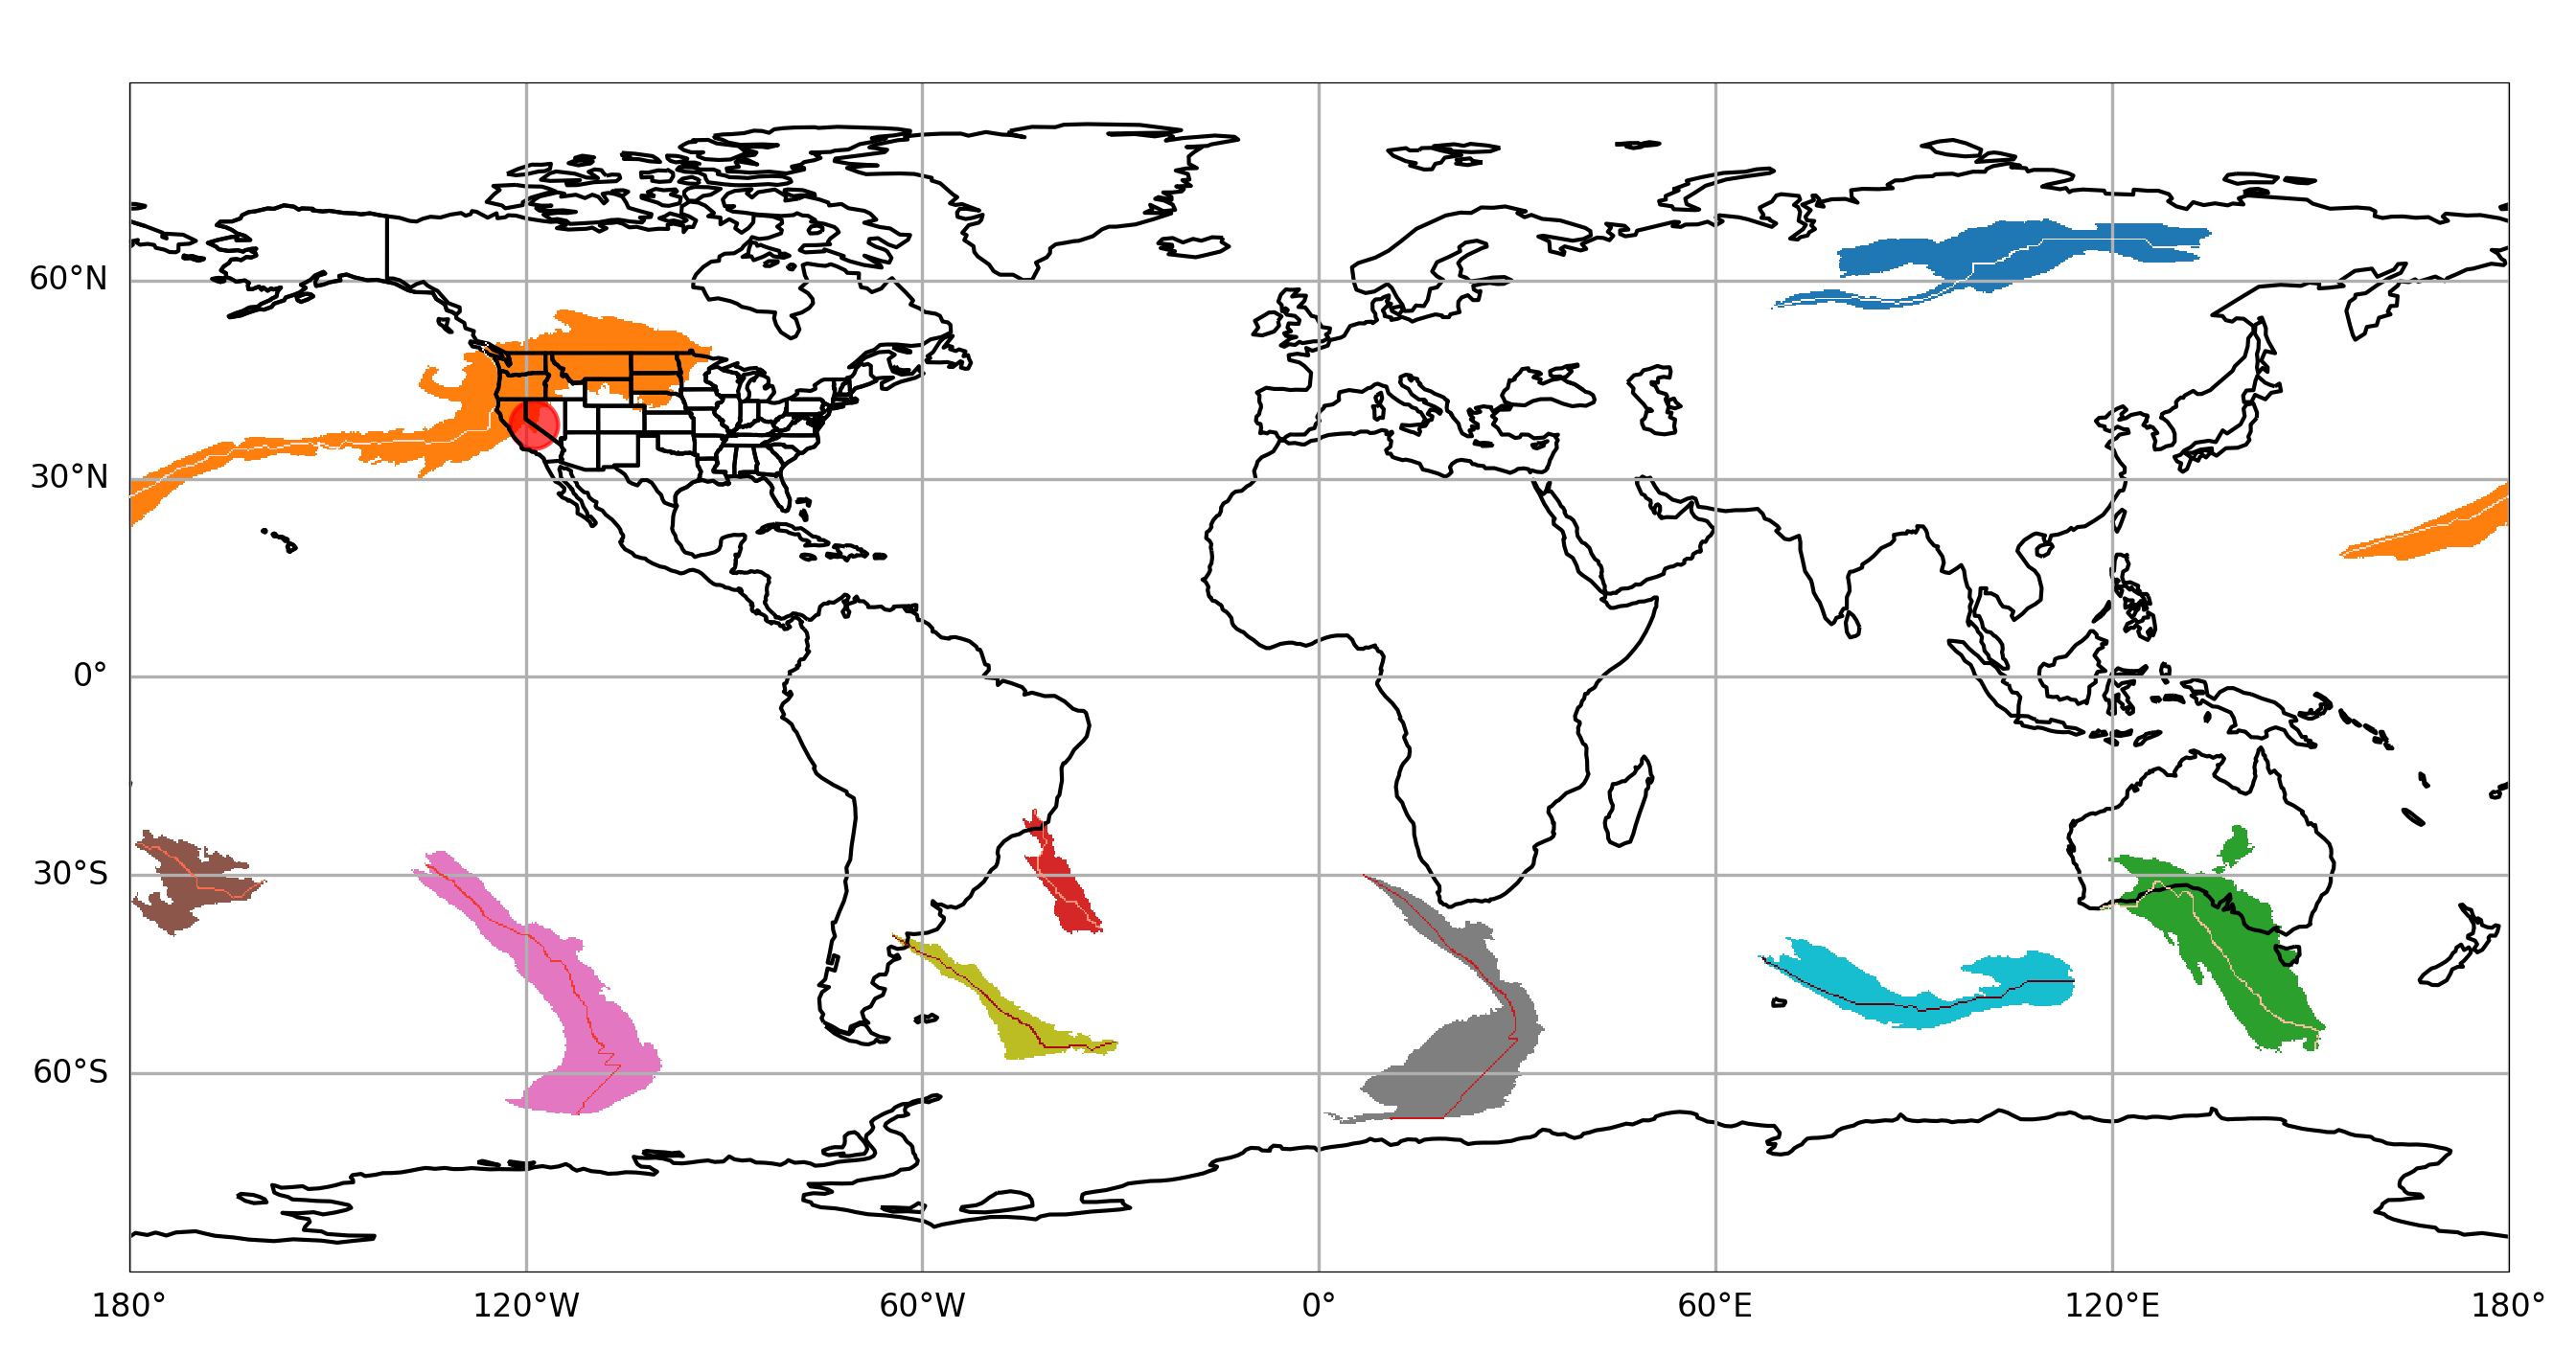

In [31]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(9,5))
gls = axs.gridlines(draw_labels=True) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
cs = data2.shapemap.plot(ax=axs, transform=ccrs.PlateCarree(), cmap='tab10', add_colorbar=False)
data2.axismap.plot(cmap='Reds', add_colorbar=False, zorder=3)

axs.plot(data3.where(data3==data3.max(), drop=True).lon.values.item(), data3.where(data3==data3.max(), drop=True).lat.values.item(), marker='o', color='red', markersize=12,
           alpha=0.7, transform=ccrs.PlateCarree())
axs.coastlines()
axs.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

axs.set_title(' ')
plt.tight_layout()
plt.show()

In [78]:
ds = xr.open_dataset('/Users/rm65238/Documents/MATLAB/IVT_generated.nc')
ds2 = ds.sel(latitude=slice(lat1,lat2), longitude=slice(lon1,lon2)).isel(ens=0, time=frame, lev=0)

In [79]:
IVT = np.sqrt(ds2.ivtx**2 + ds2.ivty**2)

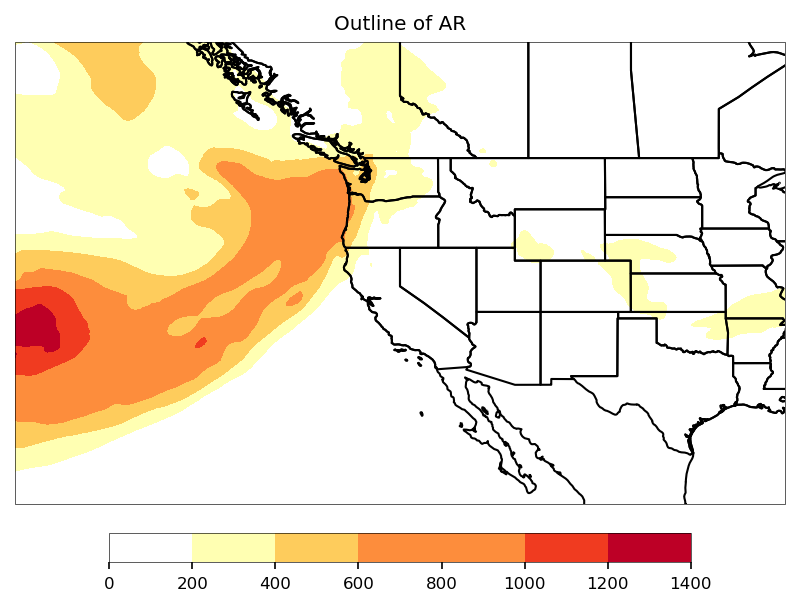

In [91]:
shapemap = data2.shapemap
ar_mask = (shapemap == shapemap.max())

# Extract contours (outlines)
contours = measure.find_contours(ar_mask.values, level=0.5)

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))

# Plot each contour
cmap = ListedColormap([
    "#ffffff", "#ffffb2", "#fecc5c", "#fd8d3c", "#f03b20", "#bd0026"
])
cb = ax.contourf(IVT.longitude, IVT.latitude, IVT, cmap=cmap, transform=ccrs.PlateCarree())

    
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
ax.coastlines()
cbar = plt.colorbar(cb, shrink = 0.5, orientation='horizontal', pad=.05)

ax.set_extent([lon1, lon2, lat2, lat1], crs=ccrs.PlateCarree())
plt.title('Outline of AR')
plt.show()

In [93]:
ar_mask.values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [86]:
data2 = data.isel(ens=0, time=frame, lev=0)
data3 = data2.lflocmap

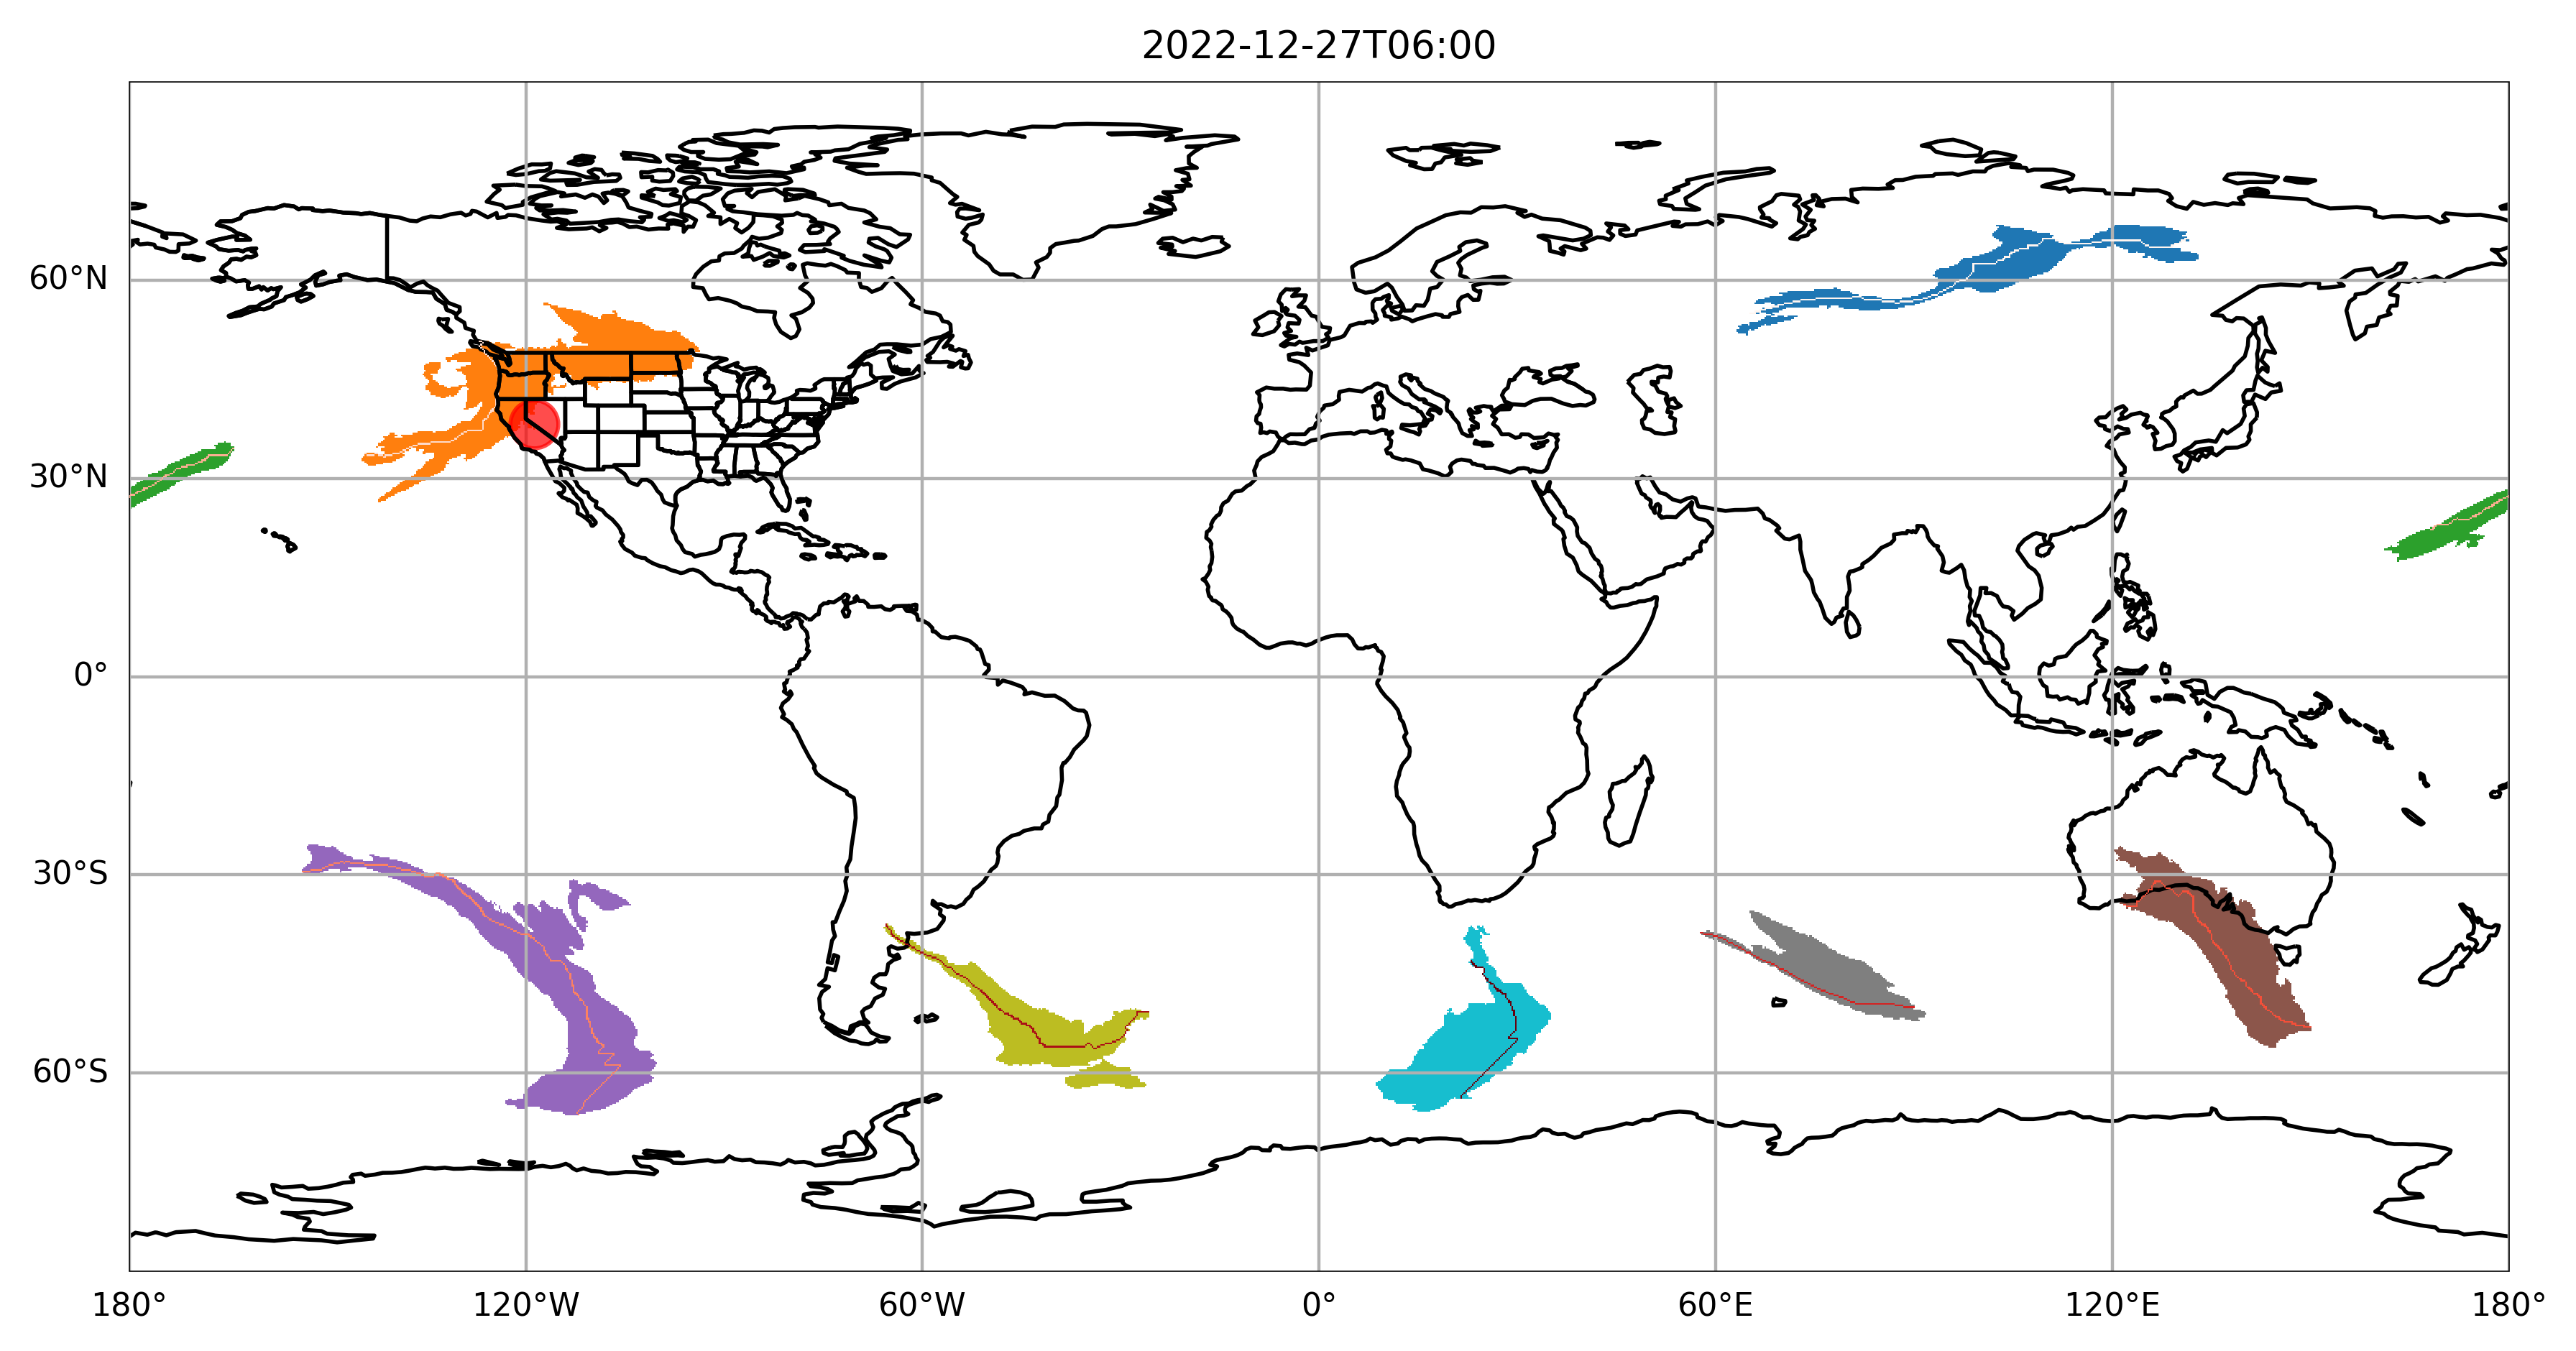

In [87]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(9,5))
gls = axs.gridlines(draw_labels=True) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
cs = data2.shapemap.plot(ax=axs, transform=ccrs.PlateCarree(), cmap='tab10', add_colorbar=False)
data2.axismap.plot(cmap='Reds', add_colorbar=False, zorder=3)

axs.plot(data3.where(data3==data3.max(), drop=True).lon.values.item(), data3.where(data3==data3.max(), drop=True).lat.values.item(), marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.PlateCarree())
axs.coastlines()
axs.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

axs.set_title(str(variable.time.values[frame])[:16])
plt.tight_layout()
plt.show()

# Animation

In [6]:
variable = data.shapemap.isel(time=range(3))

In [7]:
variable = data.shapemap

In [8]:
# Plot each contour
cmap = ListedColormap([
    "#ffffff", "#ffffb2", "#fecc5c", "#fd8d3c", "#f03b20", "#bd0026"
])

KeyboardInterrupt: 

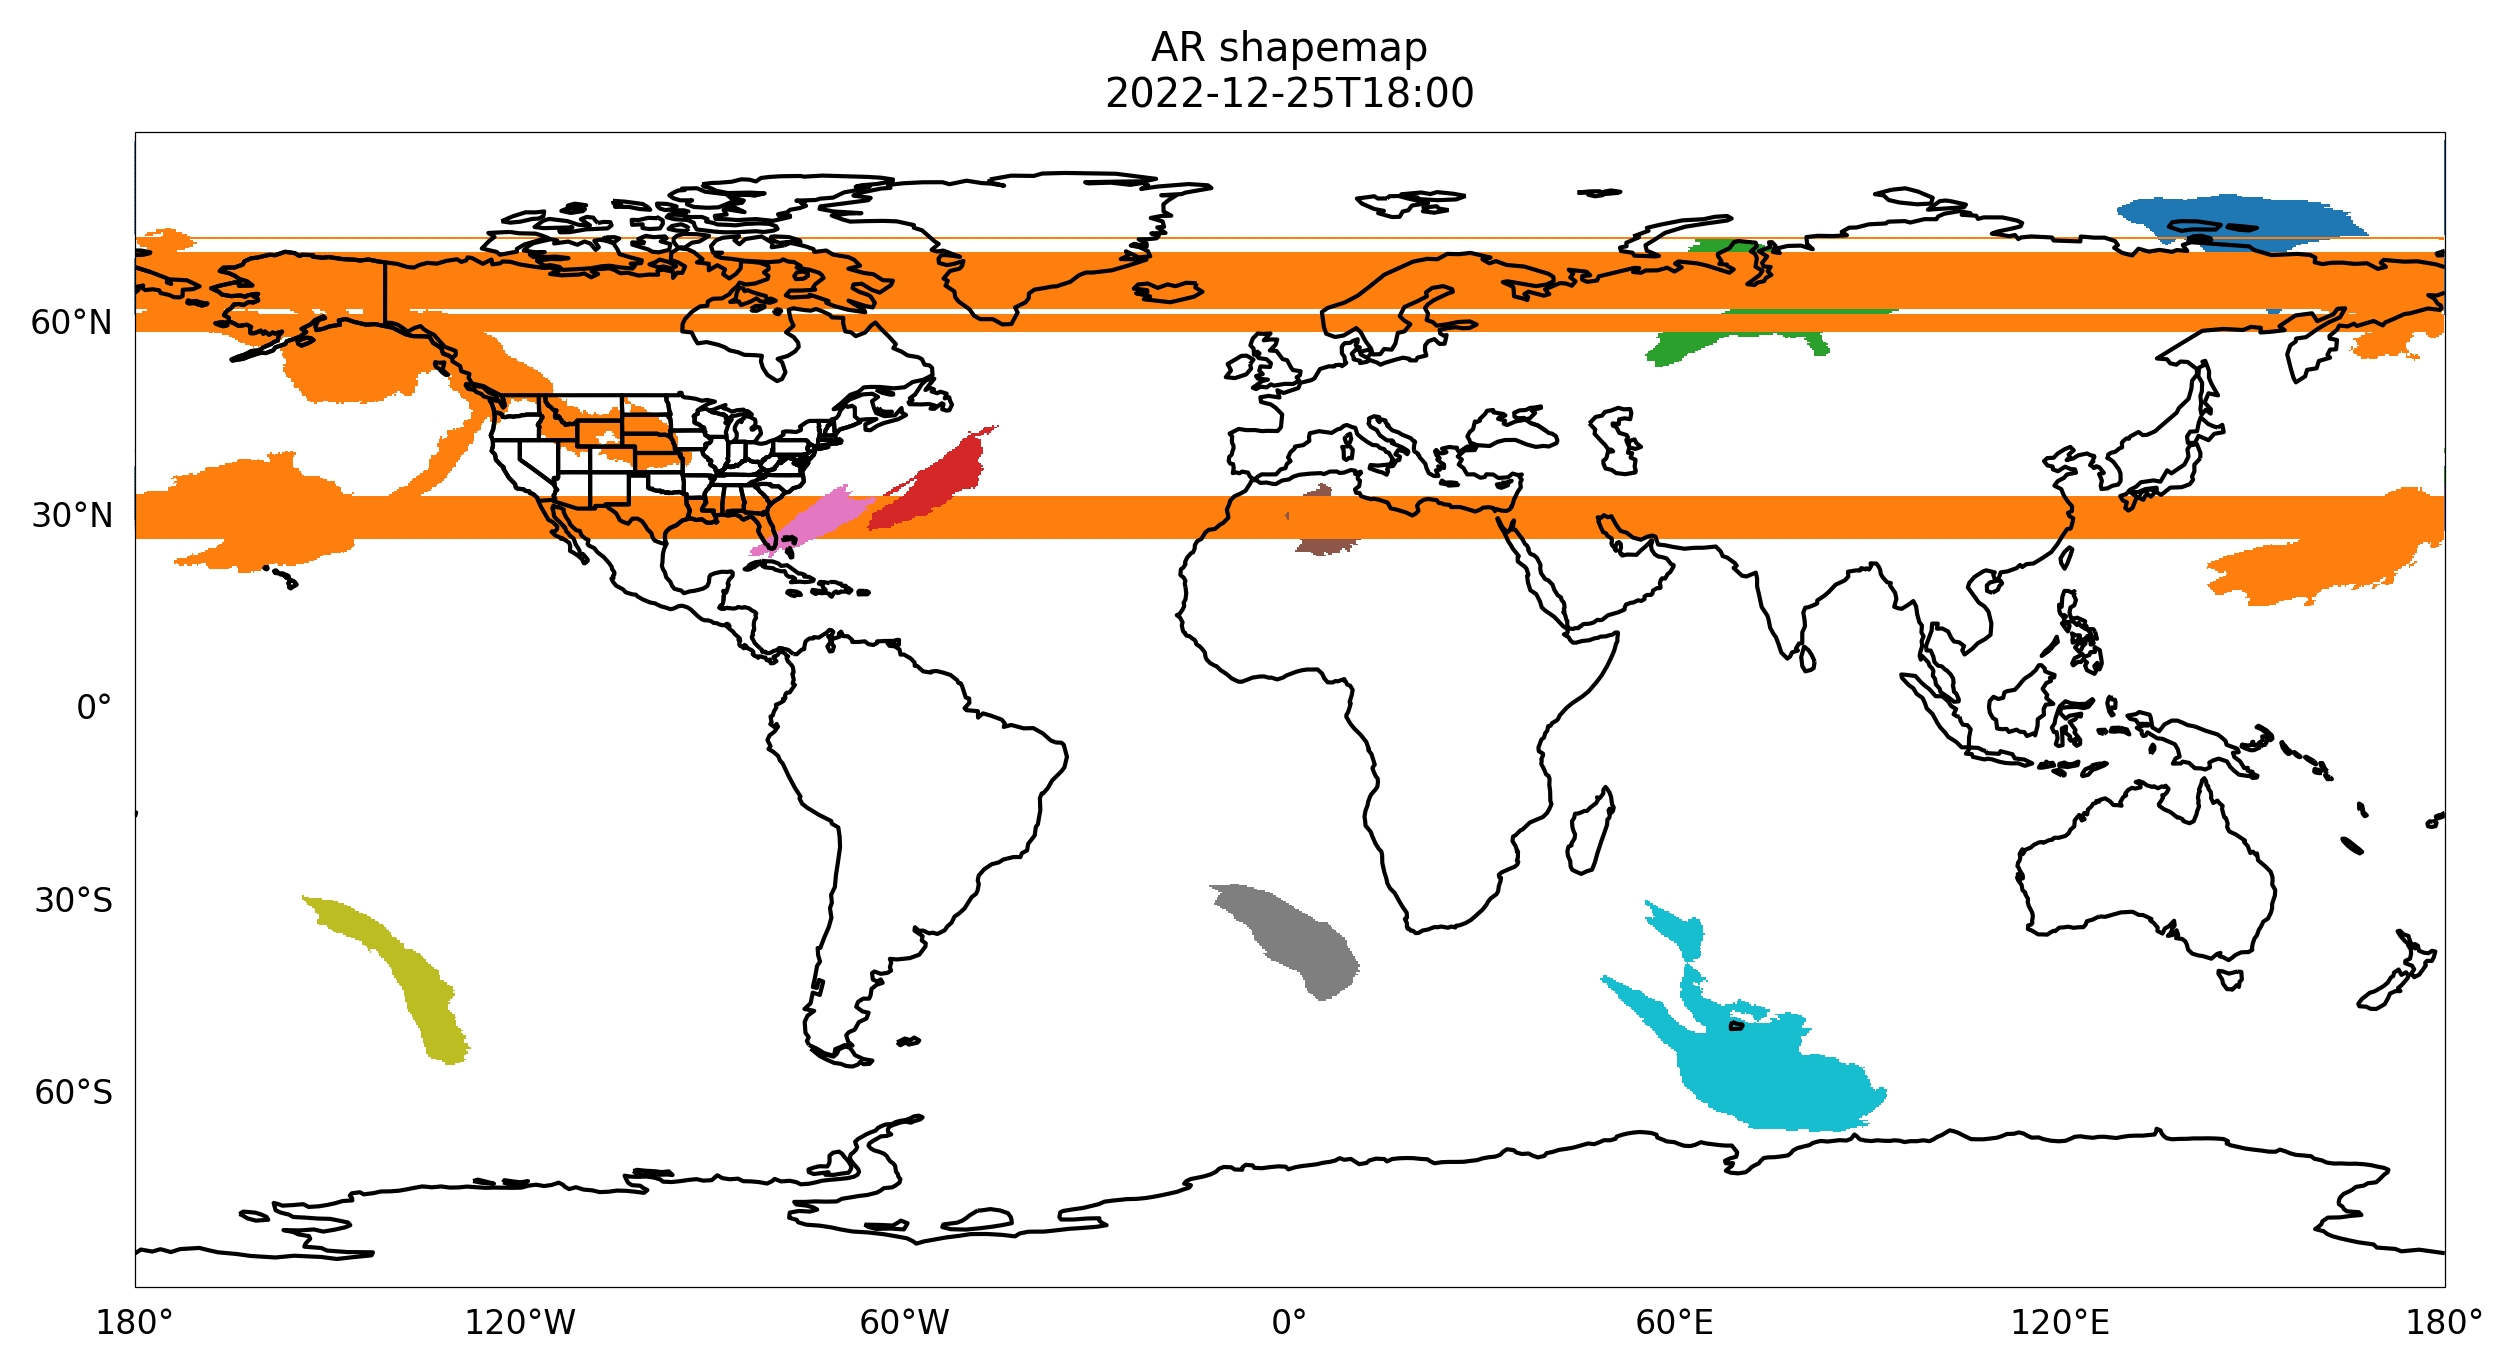

In [9]:
# Setup plot
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

gls = ax.gridlines(draw_labels=True, color='none')
gls.top_labels = False
gls.right_labels = False



# Initial frame
current_plot = [variable.isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='tab10',
    add_colorbar=False,
)]

# Title
title = ax.set_title(f"AR shapemap\n{str(variable.time.values[0])[:16]}")

# Update function
def update(frame):
    current_plot[0].remove()

    # Plot new frame
    current_plot[0] = variable.isel(time=frame).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='tab10',
        add_colorbar=False
    )
    
    title.set_text(f"AR shapemap\n{str(variable.time.values[frame])[:16]}")

    return current_plot[0], title

# Create animation
anim = FuncAnimation(fig, update, frames=len(variable.time), interval=500, blit=True)
anim.save("IVT_animation.gif", writer="pillow", fps=2)

Image(filename="IVT_animation.gif")

# MERRA-2

In [2]:
ds = xr.open_dataset('/Users/rm65238/Documents/AR database/MERRA-2/merra_combined.nc')

In [16]:
# Texas
lat1, lat2 = 37, 25.5
lon1, lon2 = 253, 270

ds2 = ds.sel(lat=slice(lat2,lat1), lon=slice(lon1,lon2), time=slice('2024-01-22', '2024-01-26'))
ds3 = ds2.lflocmap

In [17]:
#Check unique values of the variable
check = ds2.lflocmap
print(np.unique(check.values))

[ 2.  3.  4.  5.  8. nan]


In [19]:
variable = ds2.shapemap

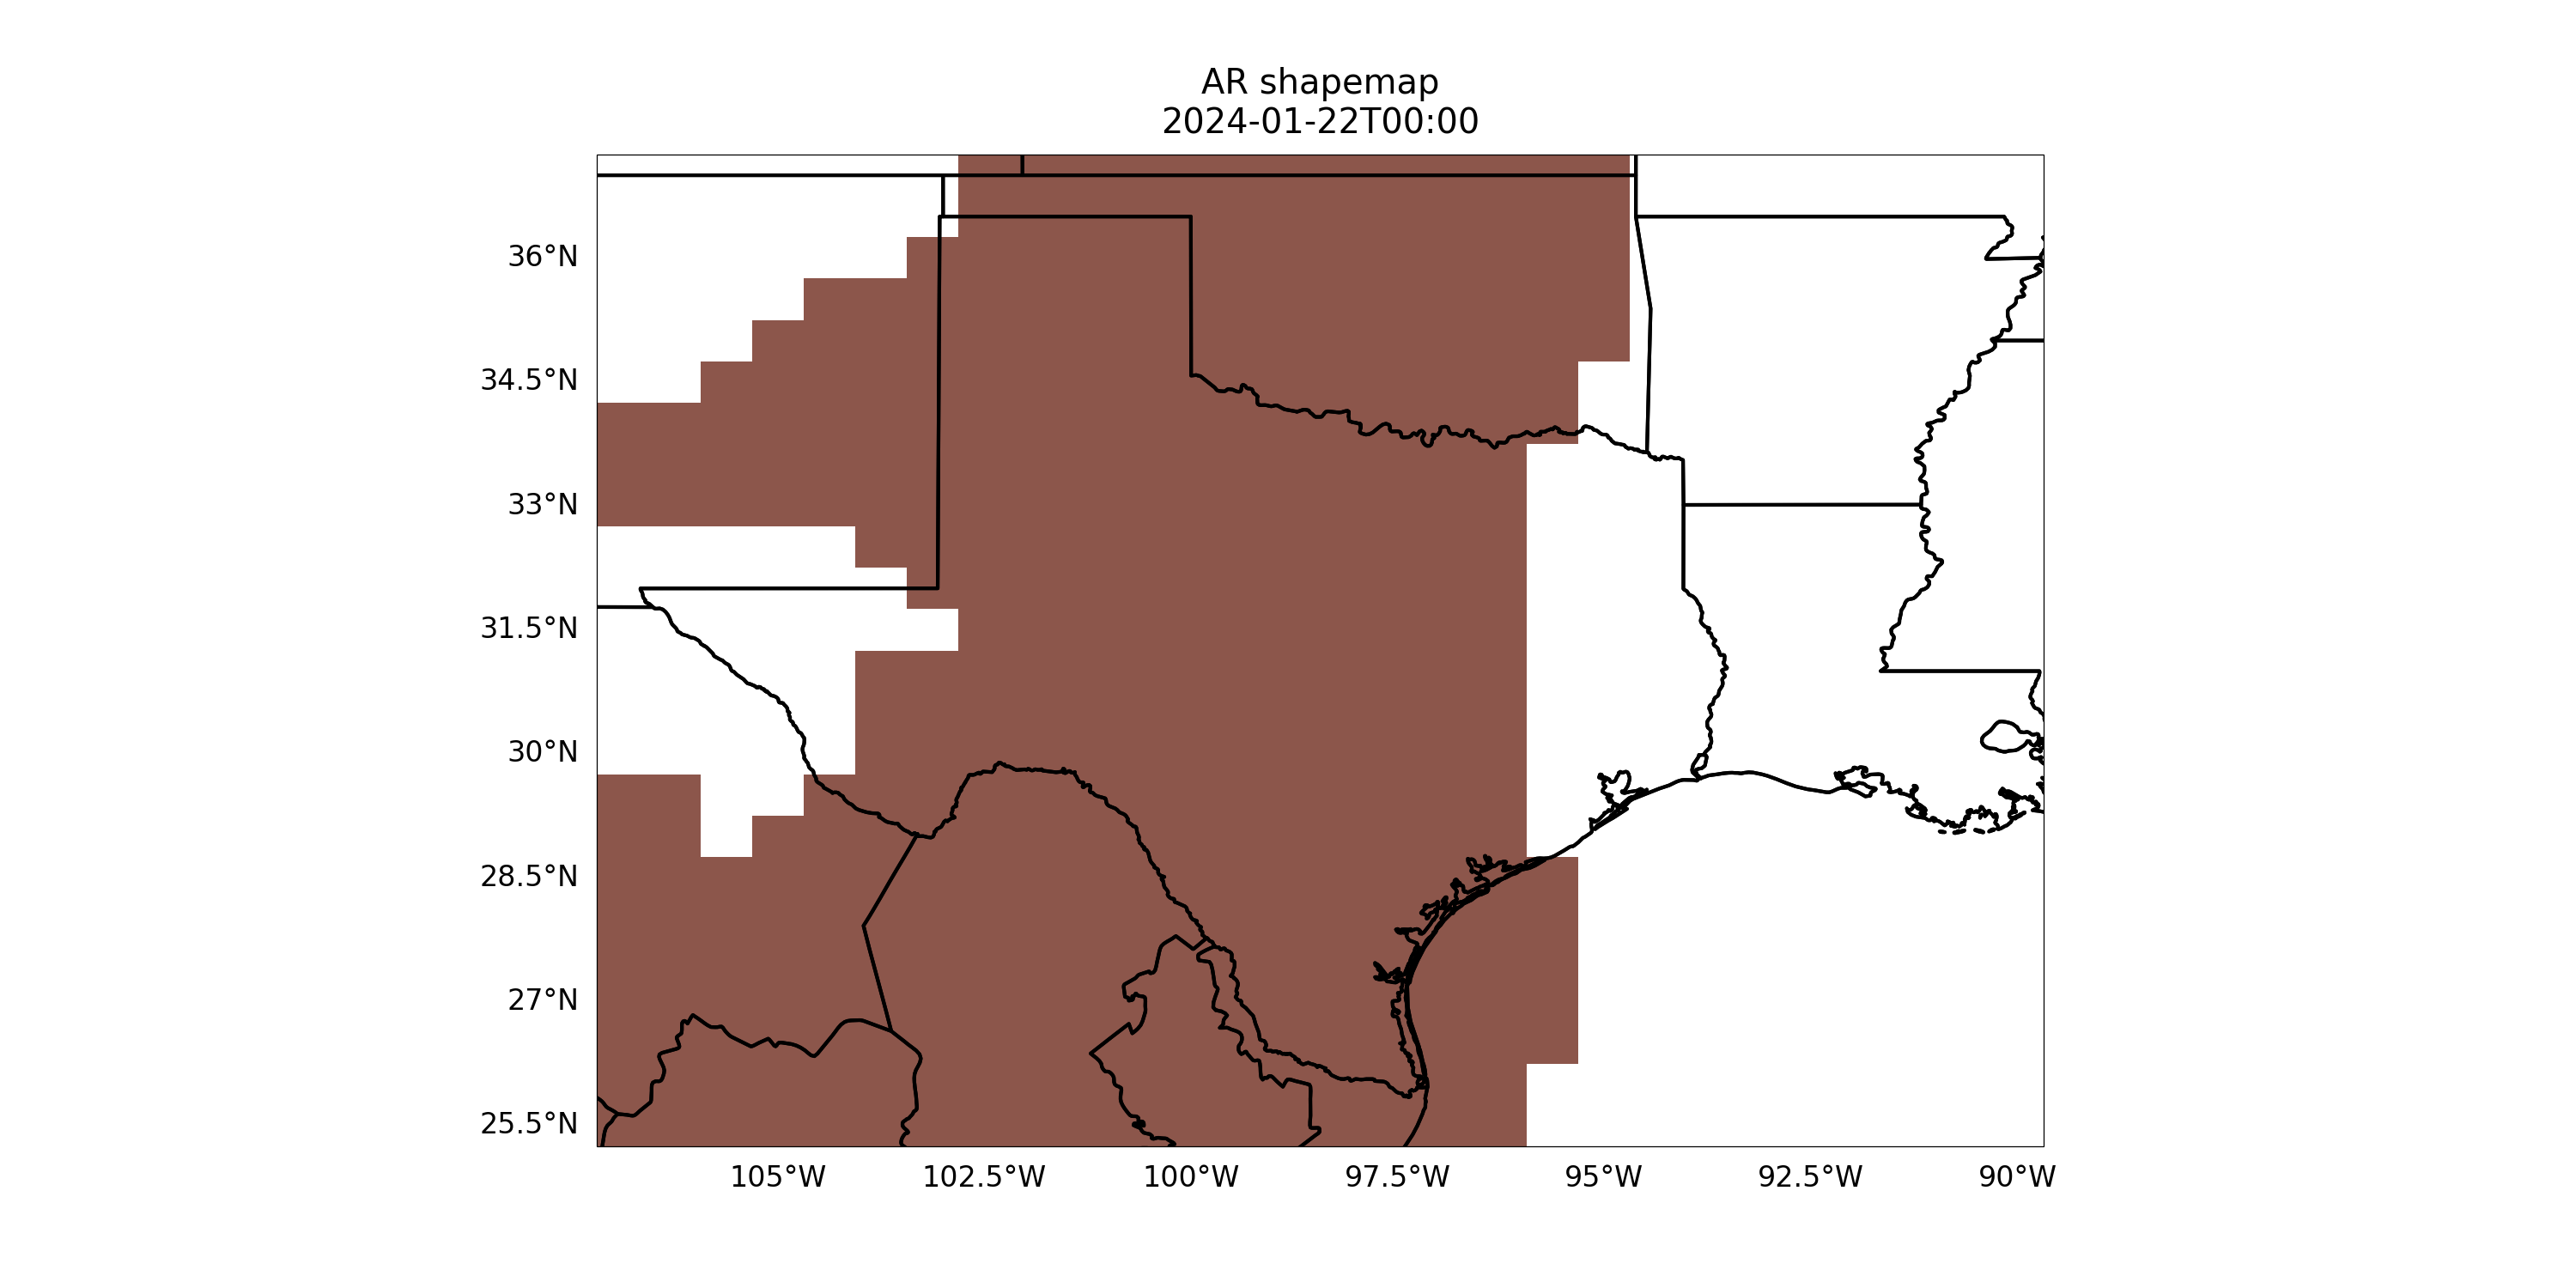

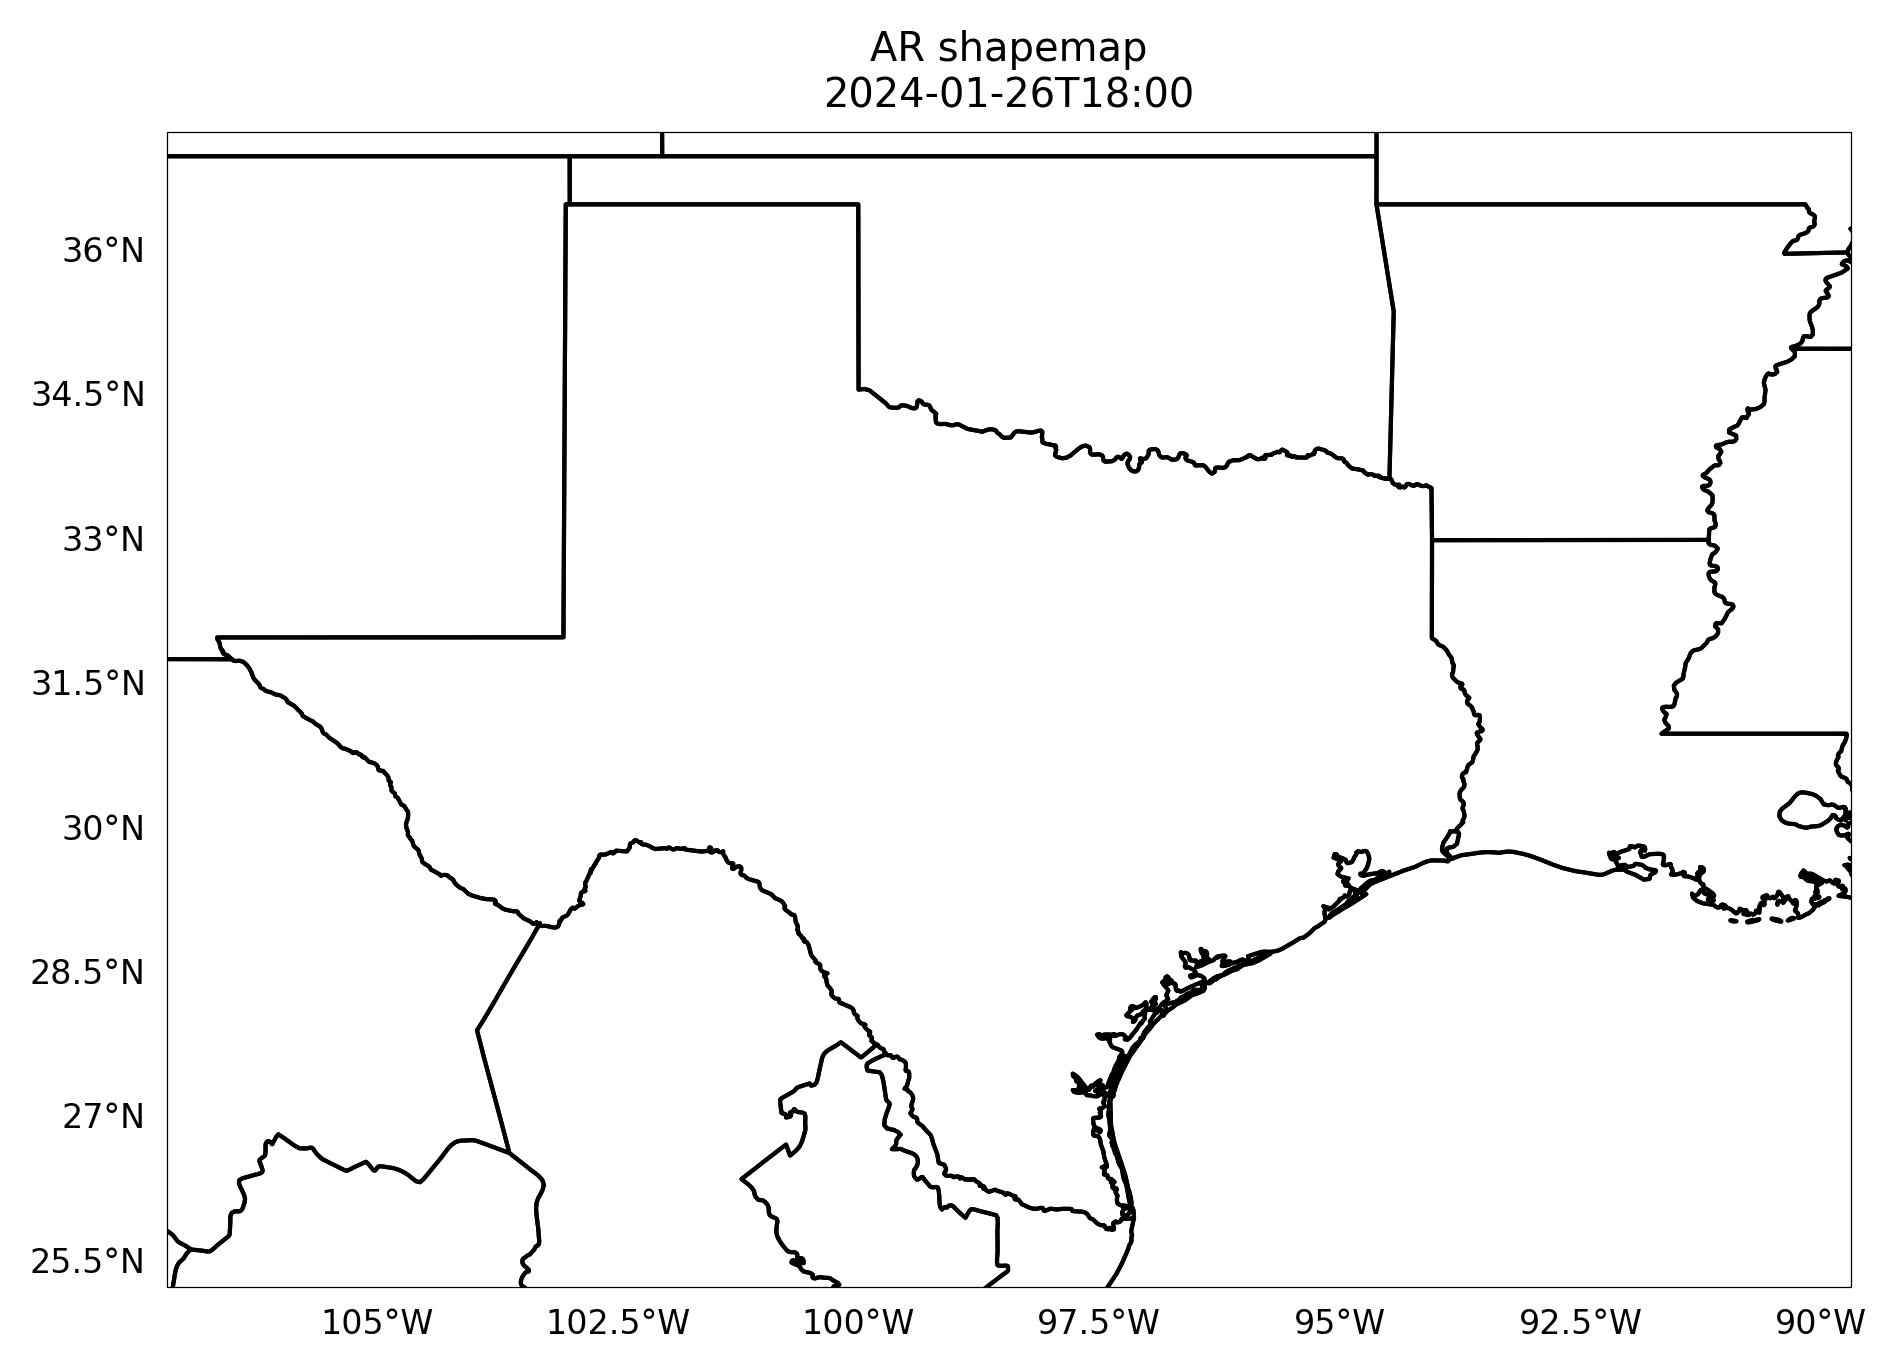

In [20]:
# Setup plot
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

gls = ax.gridlines(draw_labels=True, color='none')
gls.top_labels = False
gls.right_labels = False



# Initial frame
current_plot = [variable.isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='tab10',
    add_colorbar=False,
)]
'''

shapemap = variable.isel(time=0)
ar_mask = (shapemap == shapemap.max())
contours = measure.find_contours(ar_mask.values.item(), level=0.5)
for contour in contours:
    lat_vals = data2.lat.values[contour[:, 0].astype(int)]
    lon_vals = data2.lon.values[contour[:, 1].astype(int)]
    ax.plot(lon_vals, lat_vals, 'lawngreen', transform=ccrs.PlateCarree(), linewidth=1)
'''
# Title
title = ax.set_title(f"AR shapemap\n{str(variable.time.values[0])[:16]}")

# Update function
def update(frame):
    current_plot[0].remove()

    # Plot new frame
    current_plot[0] = variable.isel(time=frame).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='tab10',
        add_colorbar=False
    )
    
    title.set_text(f"AR shapemap\n{str(variable.time.values[frame])[:16]}")

    return current_plot[0], title

# Create animation
anim = FuncAnimation(fig, update, frames=len(variable.time), interval=500, blit=True)
anim.save("IVT_animation.gif", writer="pillow", fps=2)

Image(filename="IVT_animation.gif")